In [1]:
import pandas as pd
import numpy as np
import scipy
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.colors import ListedColormap

/home/nikolay/anaconda3/lib/python3.5/site-packages/sklearn/lda.py:4: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)
/home/nikolay/anaconda3/lib/python3.5/site-packages/sklearn/qda.py:4: DeprecationWarning: qda.QDA has been moved to discriminant_analysis.QuadraticDiscriminantAnalysis in 0.17 and will be removed in 0.19.
  "in 0.17 and will be removed in 0.19.", DeprecationWarning)


# Метод k ближайших соседей

In [83]:
dataset = sklearn.datasets.make_classification(n_classes=4, n_features=2, n_informative=2, n_redundant=0,
                                              n_clusters_per_class=1, random_state=5)

In [84]:
colors = ListedColormap(['red', 'blue', 'green', 'yellow'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightgreen', 'lightyellow'])

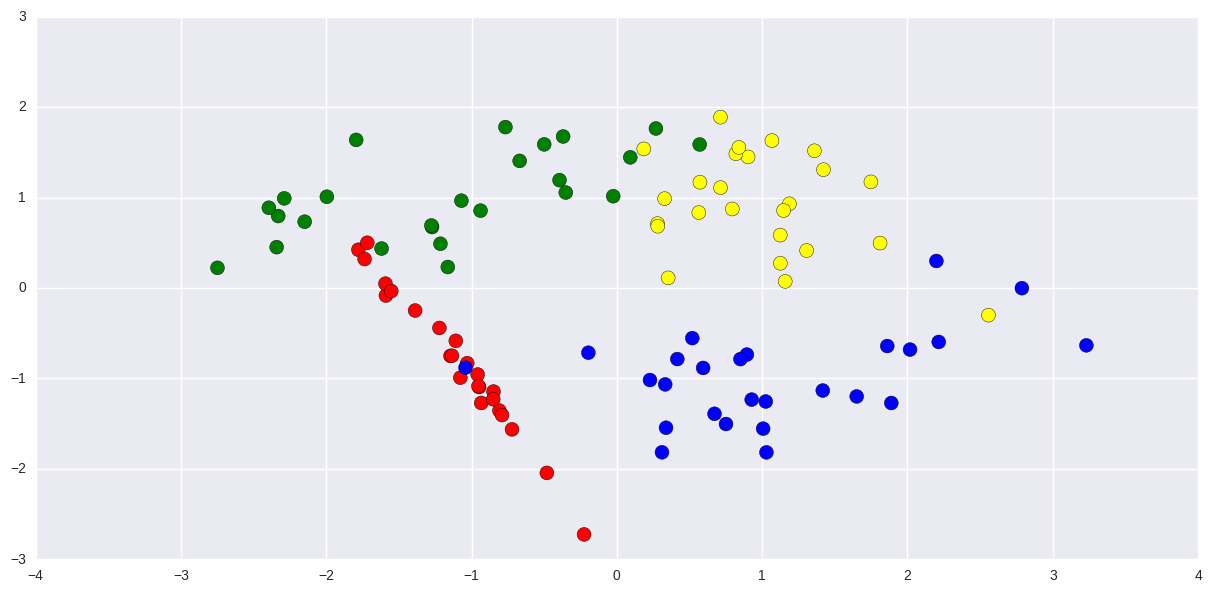

In [85]:
plt.figure(figsize=(15, 7))
plt.scatter(dataset[0][:,0], dataset[0][:,1], 
            c=dataset[1], cmap=colors, s=100)
plt.show()

Для параметра k, равному 1, 3, 5 и 10 визуализируем разделяющие поверхности, полученные при решении задачи классификации методом k ближайших соседей

In [86]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [87]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(dataset[0], 
                                                                                     dataset[1], 
                                                                                     test_size = 0.3,
                                                                                     random_state = 1)

In [88]:
def plot_decision_surface(k, estimator, train_data, train_labels, test_data, test_labels, 
                          colors = colors, light_colors = light_colors):
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    plt.figure(figsize = (15, 7))
    
    #plot decision surface on the train data 
    plt.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    plt.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    plt.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors)
    plt.title('k={:d}. Train data, accuracy={:.2f}'.format(k, metrics.accuracy_score(train_labels, estimator.predict(train_data))))
    
    #plot decision surface on the test data
    plt.subplot(1,2,2)
    plt.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    plt.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 100, cmap = colors)
    plt.title('k={:d}. Test data, accuracy={:.2f}'.format(k, metrics.accuracy_score(test_labels, estimator.predict(test_data))))

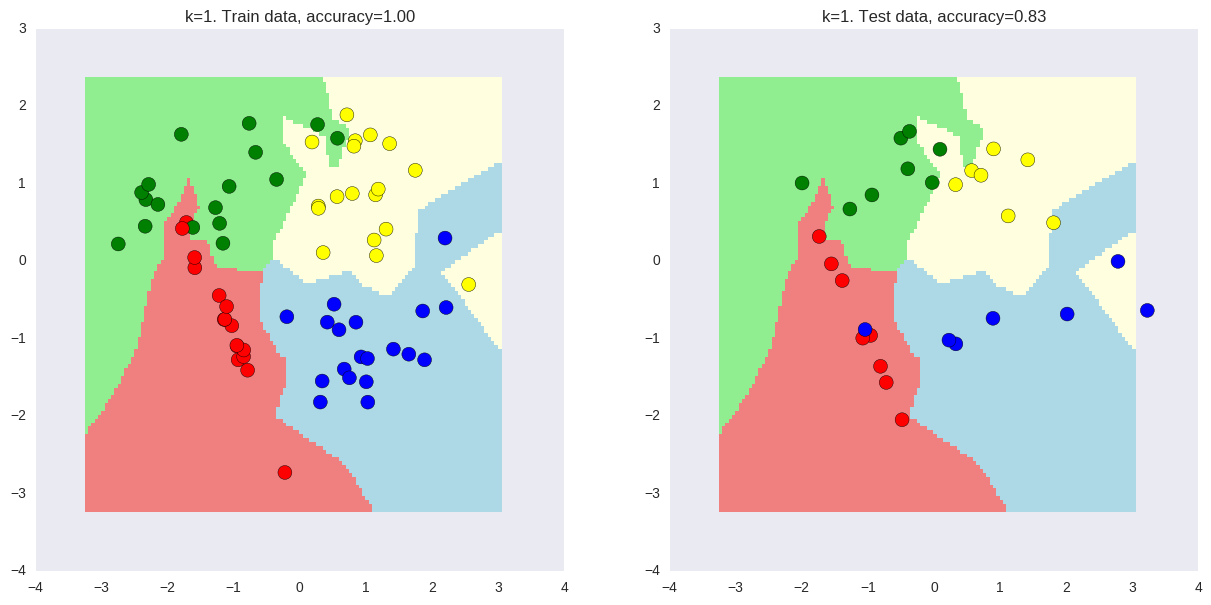

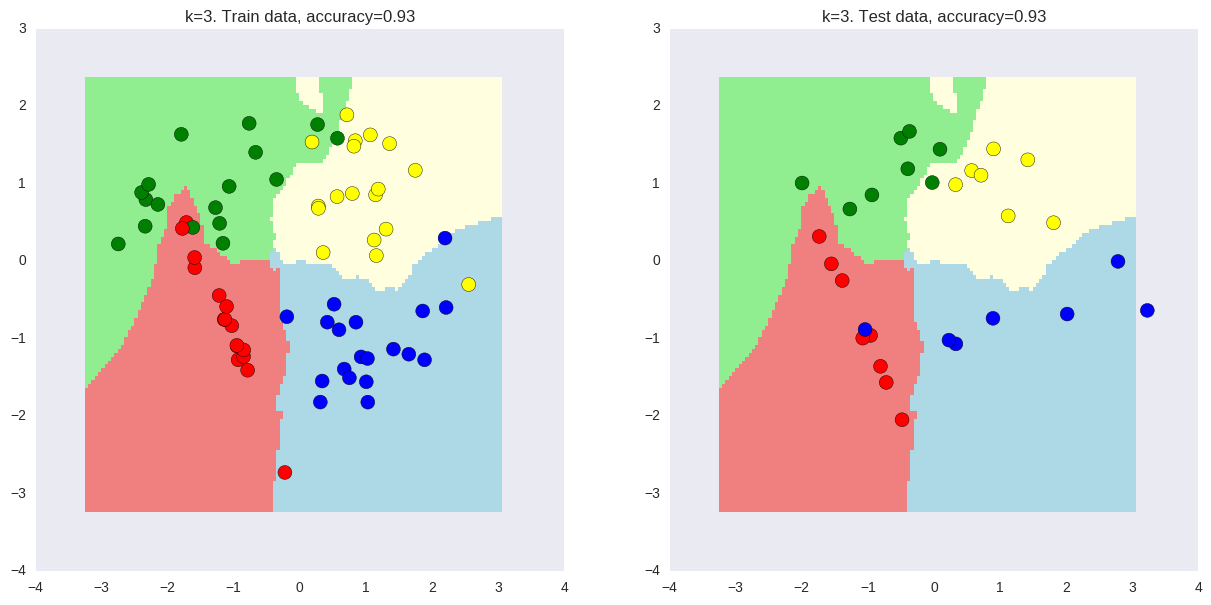

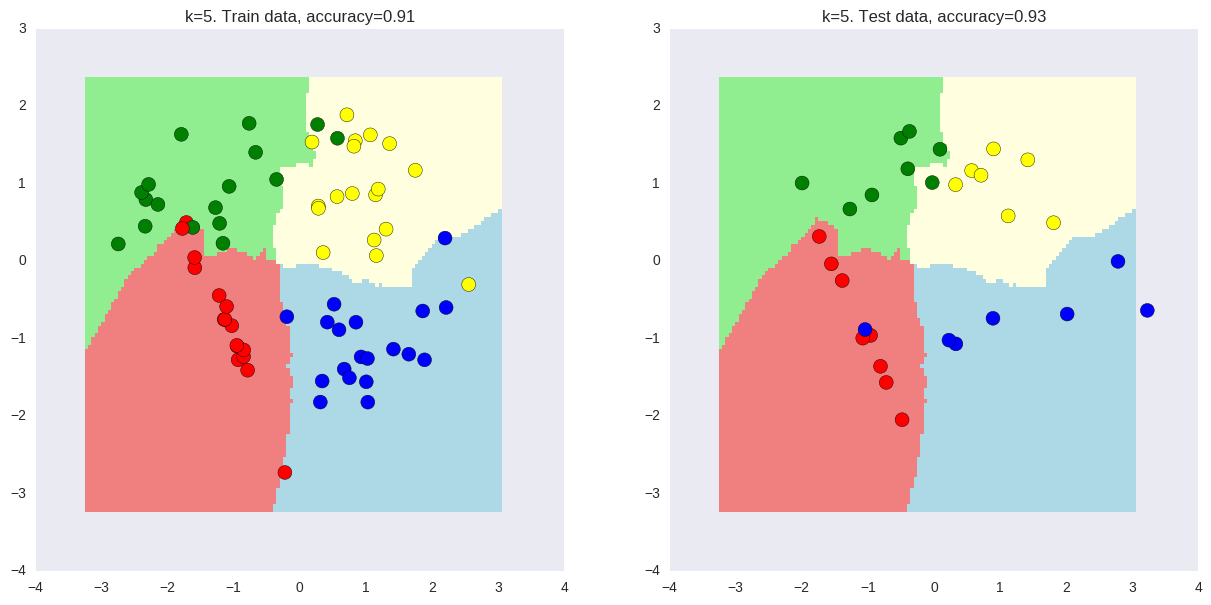

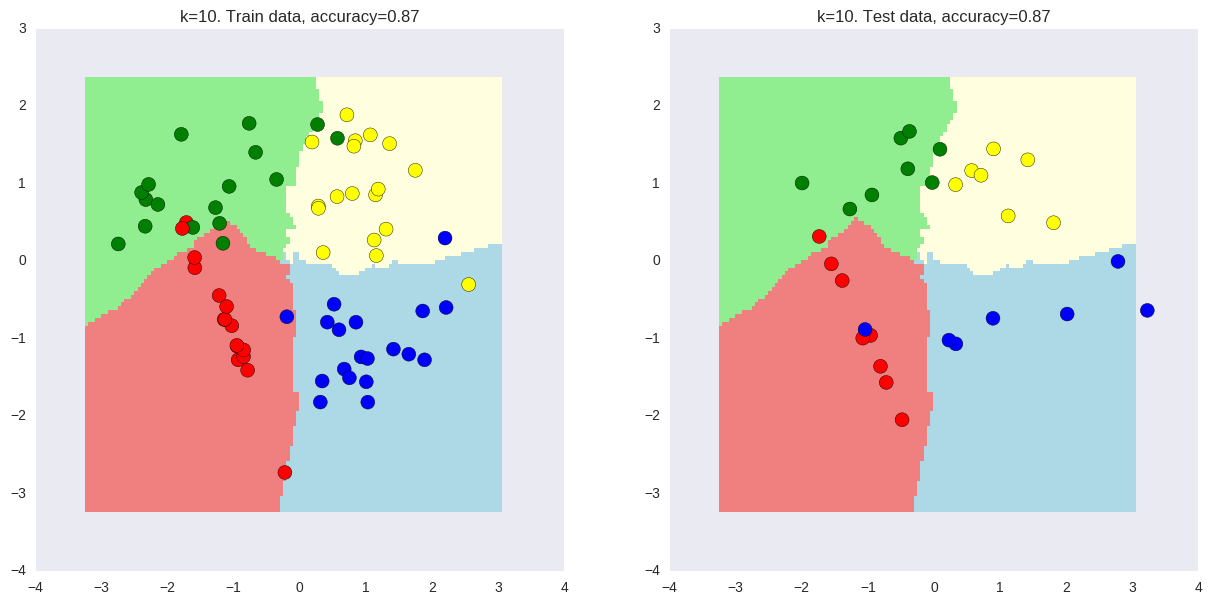

In [89]:
for k in (1, 3, 5, 10):
    estimator = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k)
    plot_decision_surface(k, estimator, train_data, train_labels, test_data, test_labels)

Классификатор имеет наилучшую обобщающую способность при k = 3, 5

In [90]:
scores = []

for num in range(1, 50):
    clf = sklearn.neighbors.KNeighborsClassifier(n_neighbors=num)
    score = sklearn.cross_validation.cross_val_score(clf, dataset[0], dataset[1], cv=5).mean()
    scores.append(score)

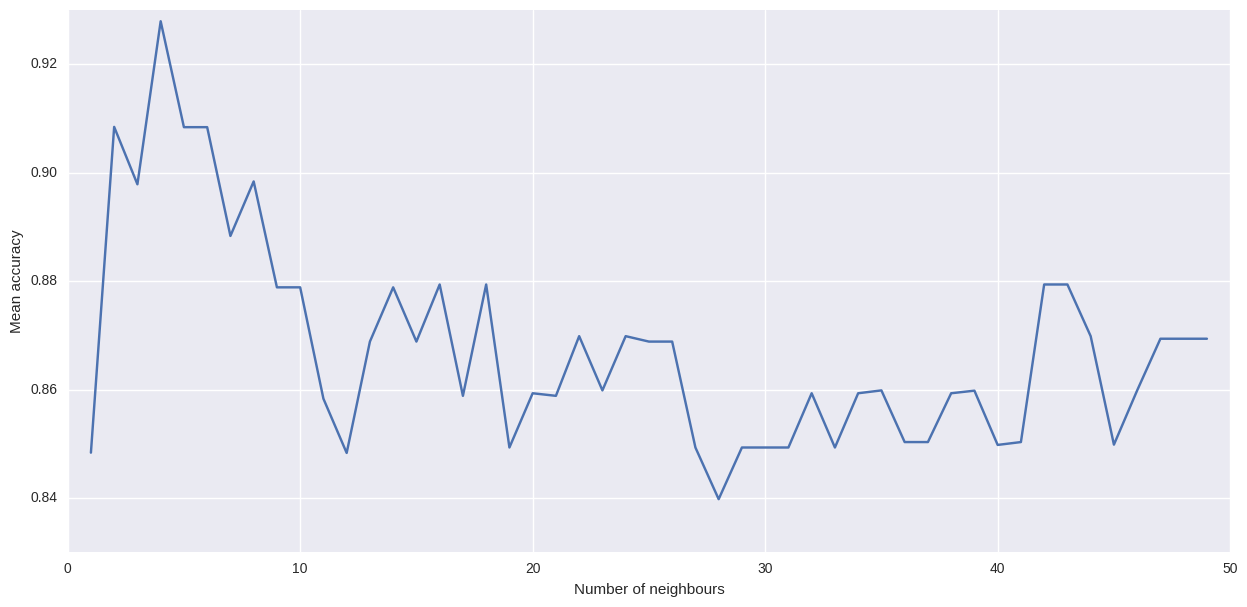

In [91]:
plt.figure(figsize=(15, 7))
plt.plot(np.arange(1, 50), scores)
plt.xlabel("Number of neighbours")
plt.ylabel("Mean accuracy")
plt.show()

Видим, что максимальное качество достигается при обучении модели с 5-7 соседями, а при больших значениях наблюдаетя эффект переобучения - качество заметно падает.

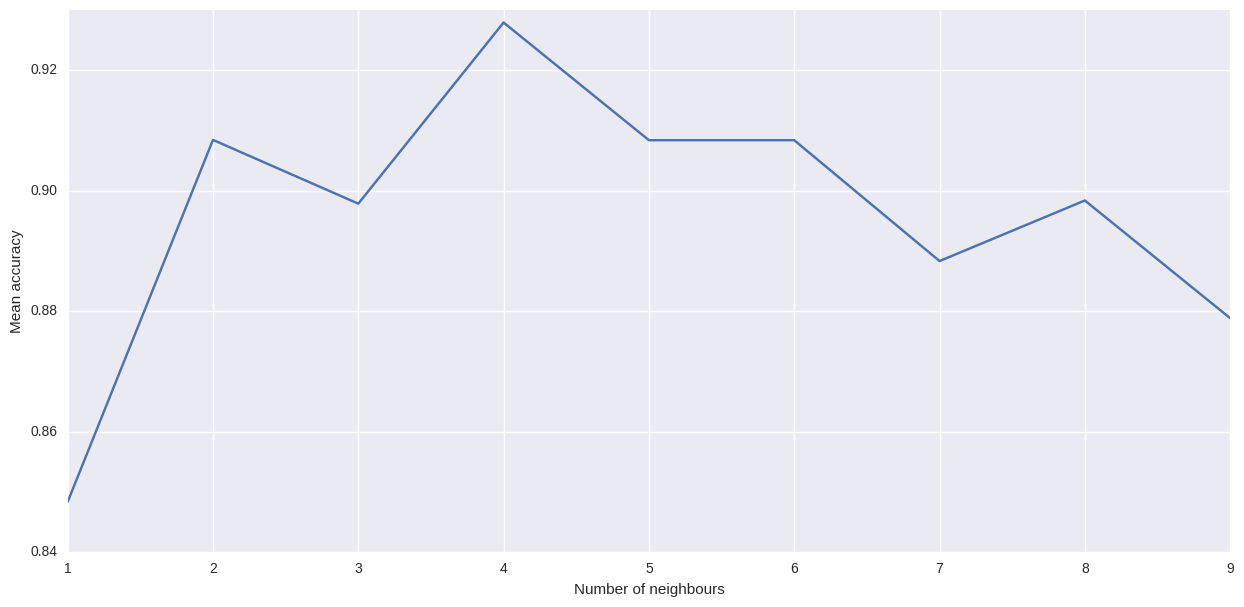

In [92]:
plt.figure(figsize=(15, 7))
plt.plot(np.arange(1, 10), scores[:9])
plt.xlabel("Number of neighbours")
plt.ylabel("Mean accuracy")
plt.show()

Делаем вывод, что оптимальное значение параметра классификатора равно 4.

# Наивный байесовский классификатор

In [8]:
digits = sklearn.datasets.load_digits()
cancer = sklearn.datasets.load_breast_cancer()

In [18]:
print(digits['data'])

[[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]


In [19]:
digits['data'].shape

(1797, 64)

In [46]:
digits_data = pd.DataFrame(digits['data'])
cancer_data = pd.DataFrame(cancer['data'])
cancer_data.columns = cancer['feature_names']

In [47]:
digits_data.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [48]:
cancer_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [49]:
digits_target = digits['target']
cancer_target = cancer['target']

Обучим байесовские классификаторы на датасете digits

In [53]:
bernouli_clf = sklearn.naive_bayes.BernoulliNB()
bernouli_score = sklearn.cross_validation.cross_val_score(bernouli_clf, digits_data.values, digits_target)

In [54]:
bernouli_score.mean()

0.82582365077805819

In [55]:
mn_clf = sklearn.naive_bayes.MultinomialNB()
mn_score = sklearn.cross_validation.cross_val_score(mn_clf, digits_data.values, digits_target)

In [56]:
mn_score.mean()

0.87087714897350532

In [57]:
gauss_clf = sklearn.naive_bayes.GaussianNB()
gauss_score = sklearn.cross_validation.cross_val_score(gauss_clf, digits_data.values, digits_target)

In [58]:
gauss_score.mean()

0.81860038035501381

Получили максимальное качество класификации 0.871, при использовании классификатора для мультиномиальных моделей. Такой результат логичен, так как мультиномиальный классификатор предназначен для работы с дискретными признаками, на которых мы и обучаемся в датасете digits.

Теперь работаем с датасетом breast_cancer

In [59]:
bernouli_score = sklearn.cross_validation.cross_val_score(bernouli_clf, cancer_data.values, cancer_target)
bernouli_score.mean()

0.62742040285899936

In [60]:
mn_score = sklearn.cross_validation.cross_val_score(mn_clf, cancer_data.values, cancer_target)
mn_score.mean()

0.89457904019307521

In [61]:
gauss_score = sklearn.cross_validation.cross_val_score(gauss_clf, cancer_data.values, cancer_target)
gauss_score.mean()

0.9367492806089297

На данном датасете бернулиевкий классификатор работает очень плохо, так как он предназначен для работы с бинарными признаками. Наибольшее среднее качество предсказаний - у Гауссовского классификатора, что можно объяснить тем, что он работает с непрерывным гауссовским распределением.

### Ответы на вопросы

1. 0.9367492806089297
2. 0.87087714897350532
3. c, d

# Метрики в задаче регрессии

Будем считать, что x имеет равномерное распределение на отрезке [-100, 100]

In [69]:
x = scipy.stats.uniform.rvs(-100, 200, size=500)
eps = scipy.stats.norm.rvs(loc=0, scale=0.2, size=500)
y = 0.5 * x + 1 + eps

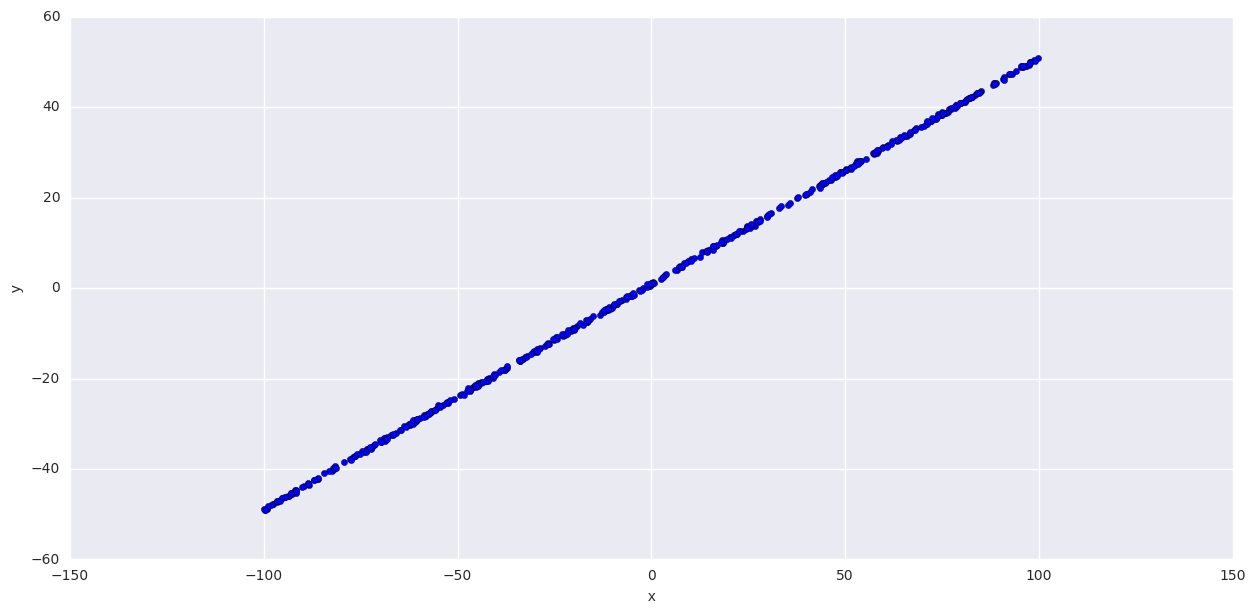

In [73]:
plt.figure(figsize=(15, 7))
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [84]:
def mse(k, b):
    err = (y - (k * x + b)) ** 2
    return np.mean(err)

In [87]:
x0 = [0, 0]
optimum = scipy.optimize.minimize(lambda x: mse(x[0], x[1]), x0)

In [88]:
optimum

      fun: 0.04034130472998025
 hess_inv: array([[  1.49744102e-04,   1.00605932e-04],
       [  1.00605932e-04,   5.00067592e-01]])
      jac: array([  1.51735730e-05,  -9.31322575e-09])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 239
      nit: 2
     njev: 57
   status: 2
  success: False
        x: array([ 0.49984184,  1.01016662])

In [89]:
k_opt, b_opt = optimum.x

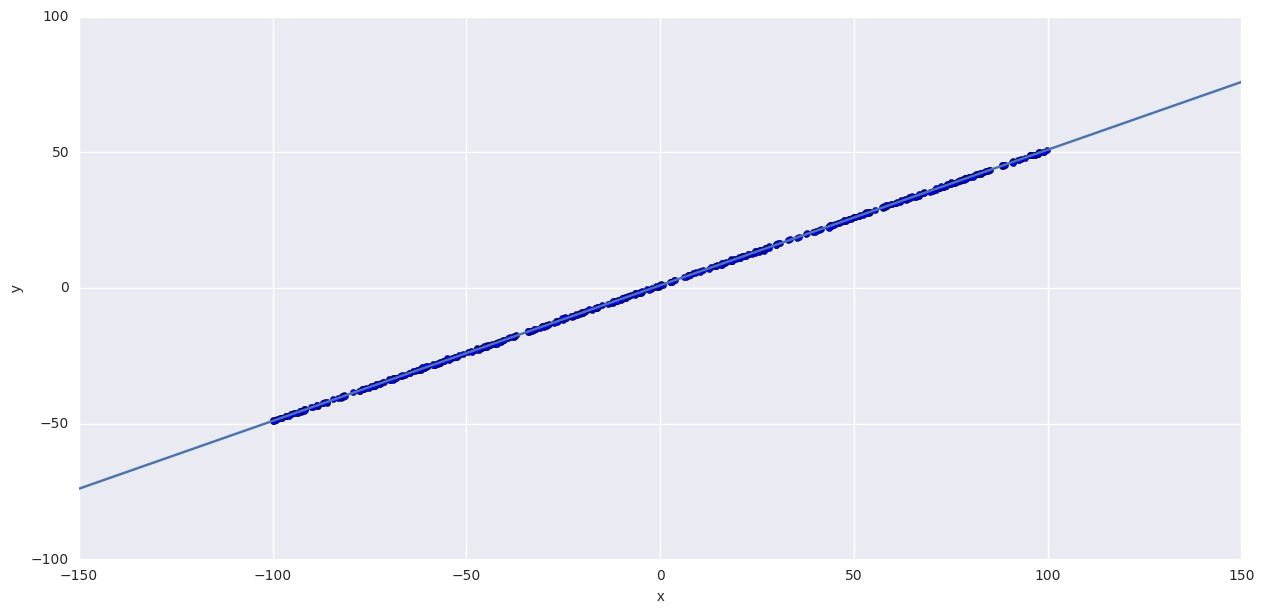

In [94]:
plt.figure(figsize=(15, 7))
plt.xlim((-150, 150))
plt.scatter(x, y)

x_val = np.array([-150, 150])
y_val = k_opt * x_val + b_opt
plt.plot(x_val, y_val)

plt.xlabel('x')
plt.ylabel('y')
plt.show()

Прямая почти идеально восстановила зависимость

In [110]:
x_new = scipy.stats.uniform.rvs(-100, 200, size=75)
eps = scipy.stats.norm.rvs(0, 0.02, size=75)
y_new = -1 + eps

In [111]:
x = np.append(x, x_new)
y = np.append(y, y_new)

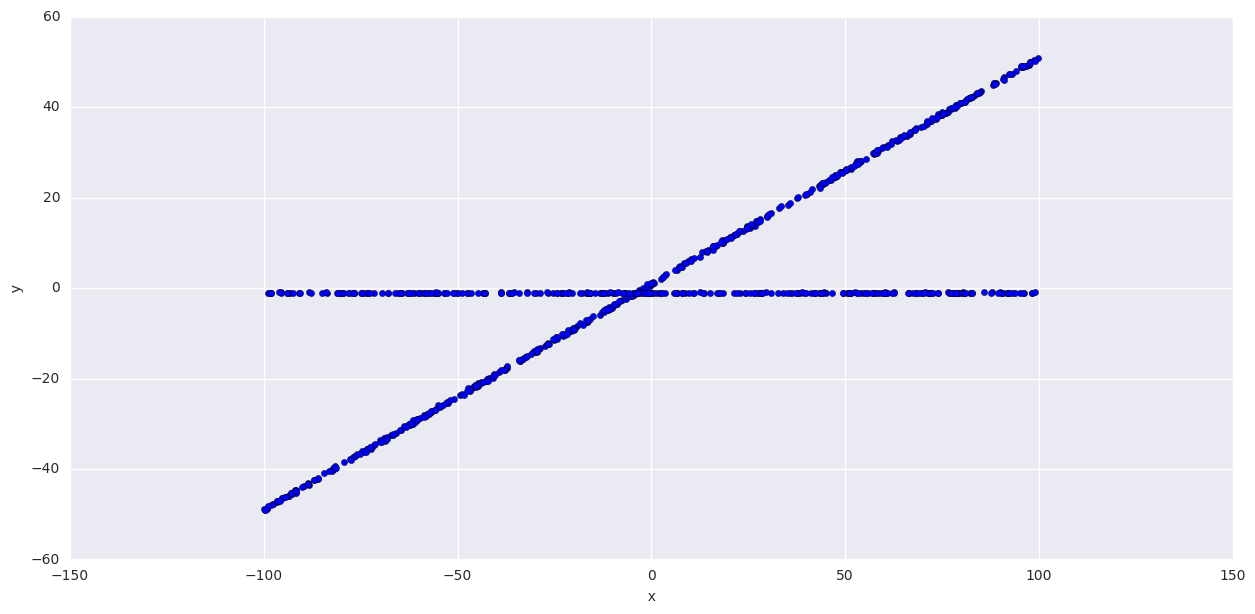

In [112]:
plt.figure(figsize=(15, 7))
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [116]:
x0 = [0, 0]
optimum_mse = scipy.optimize.minimize(lambda x: mse(x[0], x[1]), x0)

In [117]:
optimum_mse

      fun: 192.40412776660122
 hess_inv: array([[ 1.11376621, -0.37134371],
       [-0.37134371,  0.12386984]])
      jac: array([  3.05175781e-05,   5.72204590e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 164
      nit: 3
     njev: 38
   status: 2
  success: False
        x: array([ 0.31658173, -0.27174772])

In [123]:
k_opt_mse, b_opt_mse = optimum_mse.x

In [124]:
def mae(k, b):
    err = np.abs(y - (k * x + b))
    return np.mean(err)

In [125]:
x0 = [0, 0]
optimum_mae = scipy.optimize.minimize(lambda x: mae(x[0], x[1]), x0)

In [126]:
optimum_mae

      fun: 9.230956793855754
 hess_inv: array([[ 0.00028509,  0.00557775],
       [ 0.00557775,  0.14763176]])
      jac: array([ 0.02900434,  0.00250006])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 428
      nit: 11
     njev: 104
   status: 2
  success: False
        x: array([ 0.49738643,  0.97021151])

In [127]:
k_opt_mae, b_opt_mae = optimum_mae.x

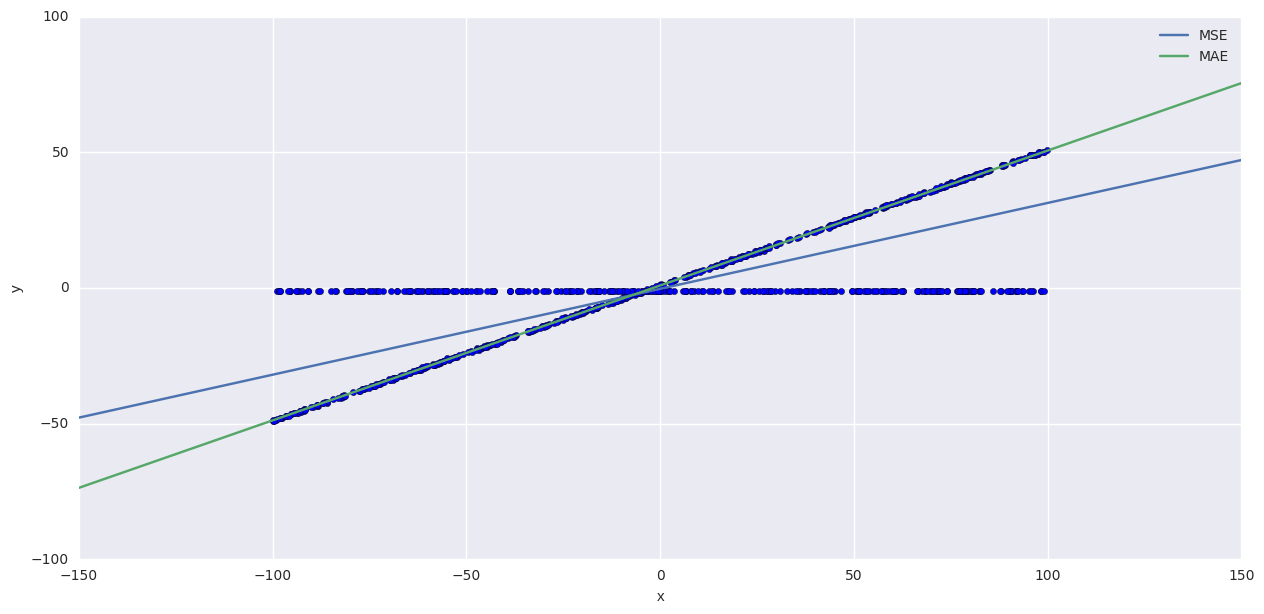

In [129]:
plt.figure(figsize=(15, 7))
plt.xlim((-150, 150))
plt.scatter(x, y)

x_val = np.array([-150, 150])
y_mse = k_opt_mse * x_val + b_opt_mse
y_mae = k_opt_mae * x_val + b_opt_mae
plt.plot(x_val, y_mse, label = 'MSE')
plt.plot(x_val, y_mae, label = 'MAE')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Из графика можно сделать вывод, что L1 - регрессия (оптимизирующая MAE) гораздо более устойчива к выбросам, чем L2 - регрессия, оптимизирующая MSE. Теоретически это можно объяснить тем, что MSE сильно штрафует за объекты - выбросы, на которых ошибка высока, и суммарное значение MSE велико, даже если таких объектов немного.